# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://pef.fa.us1.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX/job/4998">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.
- Located in Israel

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to one of the following:
    - roni.goldshmidt@ni.com / miriam.horovicz@ni.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

import shutil
def remove_folder(path):
    # check if folder exists
    if os.path.exists(path):
         # remove if exists
         shutil.rmtree(path)
    else:
         # throw your exception to handle this special scenario
         raise XXError("your exception") 
remove_folder("/kaggle/working/images/train/masks")

In [2]:
import os
import pandas as pd
import numpy as np
import zipfile
import random
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [3]:
from IPython.display import clear_output

#!pip install -q tensorflow==2.4.1

clear_output()

### Load Data

In [4]:
#load zip file
#zf = zipfile.ZipFile('data.zip') 
#!pip install keras-segmentation

In [5]:
#load train data
#df_wafers = pd.read_csv(zf.open('df_wafers.csv'))
df_wafers = pd.read_csv('/kaggle/input/scratch/data/df_wafers.csv')
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,3b2e28,0,12,False,False
1,3b2e28,0,13,True,False
2,3b2e28,0,14,False,False
3,3b2e28,0,15,True,False
4,3b2e28,0,16,True,False


In [6]:
#load test data
#df_wafers_test = pd.read_csv(zf.open('df_wafers_test.csv'))
df_wafers_test = pd.read_csv('/kaggle/input/scratch/data/df_wafers_test.csv')
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,5a6ad6,0,12,False
1,5a6ad6,0,13,True
2,5a6ad6,0,14,True
3,5a6ad6,0,15,True
4,5a6ad6,0,16,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

Select the amount of samples you want to display:

In [7]:
df_wafers_analysis = df_wafers.copy()

df_wafers_analysis['IsInked'] = (df_wafers_analysis['IsGoodDie'] == True) & (df_wafers_analysis['IsScratchDie'] == True)

df_wafers_analysis

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie,IsInked
0,3b2e28,0,12,False,False,False
1,3b2e28,0,13,True,False,False
2,3b2e28,0,14,False,False,False
3,3b2e28,0,15,True,False,False
4,3b2e28,0,16,True,False,False
...,...,...,...,...,...,...
16772087,04aef4,20,10,True,False,False
16772088,04aef4,20,11,False,False,False
16772089,04aef4,20,12,True,False,False
16772090,04aef4,20,13,False,False,False


In [8]:


df_aggr = df_wafers_analysis.groupby(['WaferName']).aggregate(
    {'DieX': 'max', 'DieY': 'max',
     'WaferName': 'count', 'IsGoodDie': 'sum',
     'IsScratchDie':'sum',
      'IsInked': 'sum'
     
    }).rename(columns={
    'DieX':'max_DieX',
    'WaferName': 'total_dies',
    "DieY": 'max_DieY',
    "IsGoodDie": 'num_good_dies',
    'IsScratchDie': 'num_scratch_dies',
    'IsInked': 'num_inked_dies'})


df_aggr["isScratched"] =  df_aggr["num_scratch_dies"] > 0 
df_aggr["GoodDieRatio"] =  df_aggr["num_good_dies"] / df_aggr["total_dies"] 




df_aggr
#df_agr.set_index('WaferName')

,max_DieX,max_DieY,total_dies,num_good_dies,num_scratch_dies,num_inked_dies,isScratched,GoodDieRatio
WaferName,,,,,,,,
001f23,34,34,1005,917,0,0,False,0.912438
002e68,84,84,5785,4535,0,0,False,0.783924
002ff9,98,98,7825,6993,0,0,False,0.893674
003483,20,20,373,305,0,0,False,0.817694
004531,42,42,1513,1133,0,0,False,0.748843
...,...,...,...,...,...,...,...,...
ffa518,70,70,4049,3795,46,12,True,0.937268
ffdb12,76,76,4765,4001,0,0,False,0.839664
ffe0d2,42,42,1513,1378,0,0,False,0.910773


<AxesSubplot:title={'center':'n of wafers with same size'}, ylabel='diodes in wafer'>

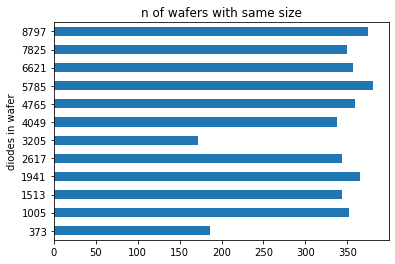

In [9]:
df_aggr.groupby("total_dies").size().plot(kind = 'barh',
                                          title = 'n of wafers with same size',
                                          xlabel = "diodes in wafer",
                                          ylabel = 'n')

<AxesSubplot:title={'center':'GoodDieRatio'}, xlabel='total_dies'>

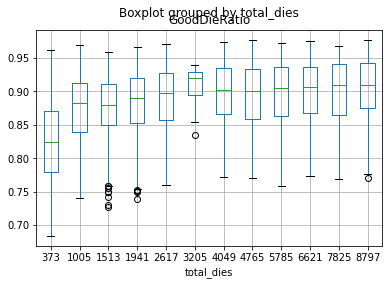

In [10]:
#df_aggr.groupby("total_dies").plot( x = "GoodDieRatio", kind = 'box' )

df_aggr.boxplot("GoodDieRatio", by="total_dies" )


<AxesSubplot:title={'center':'n of wafers with same size'}, ylabel='diodes in wafer'>

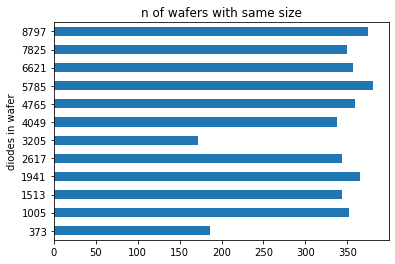

In [11]:
df_aggr.groupby("total_dies").size().plot(kind = 'barh',
                                          title = 'n of wafers with same size',
                                          xlabel = "diodes in wafer",
                                          ylabel = 'n')

<AxesSubplot:title={'center':'n of wafers with same size'}, ylabel='diodes in wafer'>

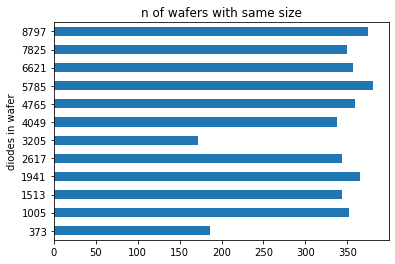

In [12]:
df_aggr.groupby("total_dies").size().plot(kind = 'barh',
                                          title = 'n of wafers with same size',
                                          xlabel = "diodes in wafer",
                                          ylabel = 'n')

In [13]:
df_aggr.groupby("total_dies").aggregate({'isScratched': 'mean',
                                        'num_scratch_dies': 'mean',
                                        'num_inked_dies': 'mean'})

,isScratched,num_scratch_dies,num_inked_dies
total_dies,,,
373,0.000000,0.000000,0.000000
1005,0.500000,11.071023,2.477273
1513,0.507289,13.113703,2.676385
1941,0.479452,14.465753,3.145205
2617,0.508721,17.377907,3.715116
3205,1.000000,37.011628,8.302326
4049,0.517751,20.813609,4.520710
4765,0.481894,22.064067,4.690808
5785,0.457895,22.428947,5.063158


EDA conclusions: There are 12 different wafer sizes, in the smallest wafer maps we have no observations of scratched dies' probably because there are a lot of low yields in this wafers compared to the other size groups.

Another intresting size in the train data is 3205 size. all of the wafers are scratched. and  the mean of scratched dies is bigger than others. 

From a buissness perspective: for size 373 wafers it's better to check the percentage of good dies to decide to return of the cheap or not. scratched dies are not likely to found there. 

for size 3205, because 100% percent of the wafers are scratched I recommend to contact the manufacturer. 

The avereage ratio of scratched wafers goes from 0.45-0.52 

## Selection of relevant machine learning models

Because we have a wafer map. My suggestion is to make an image from the maps, treat each die as a pixel, and perform pixel-wise classification. translating this to a problem in Computer Vision that's called Semantic Image Segmentation. Ussualy handled with Fully Convolutional Networks like the UNET architecture
The challange with this approach is that we have to consider:
1. The varying wafer sizes - each size group needs to be as an image of different dimensions.  From my unnderstanding of UNET it can accept images from any dimensions as input but all the images have to be of the same dimension.
2. The Imbalance of the scratched dies - because most of the dies are not scratched we need to select an appropriate loss function and the correct matric that handles this. 


In [14]:

if os.path.isdir('/kaggle/working/images') == False:
    os.mkdir('/kaggle/working/images')
    os.mkdir('/kaggle/working/images/train')
    os.mkdir('/kaggle/working/images/train/imgs')
    os.mkdir('/kaggle/working/images/train/masks')
    os.mkdir('/kaggle/working/images/test')

In [15]:
wafer_groups = df_wafers.groupby('WaferName')
gini_wafer= wafer_groups.get_group('3b2e28') 


In [16]:
df_aggr.reset_index(inplace=True)
df_aggr

,WaferName,max_DieX,max_DieY,total_dies,num_good_dies,num_scratch_dies,num_inked_dies,isScratched,GoodDieRatio
0,001f23,34,34,1005,917,0,0,False,0.912438
1,002e68,84,84,5785,4535,0,0,False,0.783924
2,002ff9,98,98,7825,6993,0,0,False,0.893674
3,003483,20,20,373,305,0,0,False,0.817694
4,004531,42,42,1513,1133,0,0,False,0.748843
...,...,...,...,...,...,...,...,...,...
3915,ffa518,70,70,4049,3795,46,12,True,0.937268
3916,ffdb12,76,76,4765,4001,0,0,False,0.839664
3917,ffe0d2,42,42,1513,1378,0,0,False,0.910773
3918,ffe584,104,104,8797,8255,74,17,True,0.938388


In [17]:
df_aggr.loc[df_aggr['total_dies'] == 4765]['max_DieX'].unique()

array([76])

In [18]:
df_aggr['max_DieX'].unique()

array([ 34,  84,  98,  20,  42,  76,  48,  56,  70,  90, 104,  62])

In [19]:
if '003483' in df_aggr.groupby('total_dies').agg({'WaferName':lambda x: list(x)}).iloc[0].to_list() :
  print("Yes, '003483' is present.")

# Build your solution

In [20]:
from PIL import Image

def data_to_images(data, directory, mask=False):

    # Group the data by the wafer name
    groups = data.groupby('WaferName')
    

    # Iterate over the groups
    for index, (name, group) in enumerate(groups):
        # Convert dataframe to 2D NumPy array
        if mask:
            img_data = group[['DieX', 'DieY', 'IsScratchDie']].values
        else:
            img_data = group[['DieX', 'DieY', 'IsGoodDie']].values
        max_x = (group['DieX']).max()
        im_size = str(max_x) + "_px"
        # Create an image
        image = Image.new('1', (max_x + 1, max_x + 1))
        # Create a list of tuples containing the coordinates and pixel values
        pixels = [(x, y, value) for x, y, value in img_data]
        # Set the pixel values in the image
        for x, y, value in pixels:
            image.putpixel((x,y), value)
        # check if directory exists
        if os.path.isdir(f"{directory}/{im_size}") == False:
            os.mkdir(f"{directory}/{im_size}")
        image.save(f"{directory}/{im_size}/{name}.png","PNG")



In [21]:
    data_to_images(df_wafers, '/kaggle/working/images/train/imgs')
    data_to_images(df_wafers,'/kaggle/working/images/train/masks', mask = True)
    data_to_images(df_wafers_test,'/kaggle/working/images/test')

In [22]:
wafer_names = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/working/images/train/imgs'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        wafer_name = filename.split(".")[0]
        wafer_names.append(wafer_name)

d = {"WaferName": wafer_names, "img_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('WaferName')
#df


In [23]:
wafer_names = []
mask_paths = []
for dirname, _, filenames in os.walk('/kaggle/working/images/train/masks'):
    for filename in filenames:
        mask_path = os.path.join(dirname, filename)    
        mask_paths.append(mask_path)
        
        wafer_name = filename.split(".")[0]
        wafer_names.append(wafer_name)

g = {"WaferName": wafer_names, "mask_path": mask_paths}
df_mask = pd.DataFrame(data = g)
df_mask = df_mask.set_index('WaferName')
df["mask_path"] = df_mask["mask_path"]
df

,img_path,mask_path
WaferName,,
80467a,/kaggle/working/images/train/imgs/20_px/80467a...,/kaggle/working/images/train/masks/20_px/80467...
53863d,/kaggle/working/images/train/imgs/20_px/53863d...,/kaggle/working/images/train/masks/20_px/53863...
b54dc5,/kaggle/working/images/train/imgs/20_px/b54dc5...,/kaggle/working/images/train/masks/20_px/b54dc...
d70eff,/kaggle/working/images/train/imgs/20_px/d70eff...,/kaggle/working/images/train/masks/20_px/d70ef...
f4a1f6,/kaggle/working/images/train/imgs/20_px/f4a1f6...,/kaggle/working/images/train/masks/20_px/f4a1f...
...,...,...
84b7f4,/kaggle/working/images/train/imgs/42_px/84b7f4...,/kaggle/working/images/train/masks/42_px/84b7f...
bdb027,/kaggle/working/images/train/imgs/42_px/bdb027...,/kaggle/working/images/train/masks/42_px/bdb02...
0a3f05,/kaggle/working/images/train/imgs/42_px/0a3f05...,/kaggle/working/images/train/masks/42_px/0a3f0...


In [24]:
wafer_names = []
mask_paths = []
for dirname, _, filenames in os.walk('/kaggle/working/images/test'):
    for filename in filenames:
        mask_path = os.path.join(dirname, filename)    
        mask_paths.append(mask_path)
        
        wafer_name = filename.split(".")[0]
        wafer_names.append(wafer_name)

g = {"WaferName": wafer_names, "img_path": mask_paths}
df_test = pd.DataFrame(data = g)
df_test = df_test.set_index('WaferName')
df_test

,img_path
WaferName,
adecb3,/kaggle/working/images/test/20_px/adecb3.png
669a68,/kaggle/working/images/test/20_px/669a68.png
1c7ebf,/kaggle/working/images/test/20_px/1c7ebf.png
2da14c,/kaggle/working/images/test/20_px/2da14c.png
68147f,/kaggle/working/images/test/20_px/68147f.png
...,...
4d6c2d,/kaggle/working/images/test/42_px/4d6c2d.png
1dba6b,/kaggle/working/images/test/42_px/1dba6b.png
8a9f23,/kaggle/working/images/test/42_px/8a9f23.png


In [25]:
df

,img_path,mask_path
WaferName,,
80467a,/kaggle/working/images/train/imgs/20_px/80467a...,/kaggle/working/images/train/masks/20_px/80467...
53863d,/kaggle/working/images/train/imgs/20_px/53863d...,/kaggle/working/images/train/masks/20_px/53863...
b54dc5,/kaggle/working/images/train/imgs/20_px/b54dc5...,/kaggle/working/images/train/masks/20_px/b54dc...
d70eff,/kaggle/working/images/train/imgs/20_px/d70eff...,/kaggle/working/images/train/masks/20_px/d70ef...
f4a1f6,/kaggle/working/images/train/imgs/20_px/f4a1f6...,/kaggle/working/images/train/masks/20_px/f4a1f...
...,...,...
84b7f4,/kaggle/working/images/train/imgs/42_px/84b7f4...,/kaggle/working/images/train/masks/42_px/84b7f...
bdb027,/kaggle/working/images/train/imgs/42_px/bdb027...,/kaggle/working/images/train/masks/42_px/bdb02...
0a3f05,/kaggle/working/images/train/imgs/42_px/0a3f05...,/kaggle/working/images/train/masks/42_px/0a3f0...


In [26]:
df_aggr

,WaferName,max_DieX,max_DieY,total_dies,num_good_dies,num_scratch_dies,num_inked_dies,isScratched,GoodDieRatio
0,001f23,34,34,1005,917,0,0,False,0.912438
1,002e68,84,84,5785,4535,0,0,False,0.783924
2,002ff9,98,98,7825,6993,0,0,False,0.893674
3,003483,20,20,373,305,0,0,False,0.817694
4,004531,42,42,1513,1133,0,0,False,0.748843
...,...,...,...,...,...,...,...,...,...
3915,ffa518,70,70,4049,3795,46,12,True,0.937268
3916,ffdb12,76,76,4765,4001,0,0,False,0.839664
3917,ffe0d2,42,42,1513,1378,0,0,False,0.910773
3918,ffe584,104,104,8797,8255,74,17,True,0.938388


In [27]:
df_aggr['max_DieX']

0        34
1        84
2        98
3        20
4        42
       ... 
3915     70
3916     76
3917     42
3918    104
3919     34
Name: max_DieX, Length: 3920, dtype: int64

In [28]:
df = df.join(df_aggr[['WaferName', 'max_DieX']].set_index('WaferName') ,on = 'WaferName')

In [29]:
def data_augmentation(wafer_img, wafer_mask):

    if tf.random.uniform(()) > 0.5:
        wafer_img = tf.image.flip_left_right(wafer_img)
        wafer_mask = tf.image.flip_left_right(wafer_mask)

    return wafer_img, wafer_mask

def preprocessing( wafer_path, mask_path):
    #img_size = [size + 1 , size + 1]
    wafer_img = tf.io.read_file(wafer_path) 
    wafer_img = tf.image.decode_png(wafer_img, channels=1)
    wafer_img = tf.image.resize(wafer_img, img_size)
    wafer_img = tf.cast(wafer_img, tf.float32) / 255.0
    
    
    wafer_mask = tf.io.read_file(mask_path)
    wafer_mask = tf.image.decode_png(wafer_mask, channels=1)
    wafer_mask = tf.image.resize(wafer_mask, img_size)
    wafer_mask = tf.cast(wafer_mask, tf.float32)
    wafer_mask = wafer_mask[:,:,:1]    
    wafer_mask = tf.math.sign(wafer_mask)
    
    return wafer_img, wafer_mask

def preprocessing_test(wafer_path):
    #img_size = [size + 1 , size + 1]
    wafer_img = tf.io.read_file(wafer_path) 
    wafer_img = tf.image.decode_png(wafer_img, channels=1)
    wafer_img = tf.image.resize(wafer_img, img_size)
    wafer_img = tf.cast(wafer_img, tf.float32) / 255.0
    
    return wafer_img

def create_dataset(data , split_type = None , size = 34  ):
    data_temp = data.loc[data['max_DieX'] == size]
    
    
    if split_type == 'valid':
        ds = tf.data.Dataset.from_tensor_slices((data_temp["img_path"].values, data_temp["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        
    elif split_type == 'test':
        ds = tf.data.Dataset.from_tensor_slices((data_temp["img_path"].values))
        ds = ds.map(preproccesing_test, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((data_temp["img_path"].values, data_temp["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)


    return ds

In [30]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=0.25)
train_df

,img_path,mask_path,max_DieX
WaferName,,,
b461b5,/kaggle/working/images/train/imgs/104_px/b461b...,/kaggle/working/images/train/masks/104_px/b461...,104
3d6b8d,/kaggle/working/images/train/imgs/42_px/3d6b8d...,/kaggle/working/images/train/masks/42_px/3d6b8...,42
f062a7,/kaggle/working/images/train/imgs/56_px/f062a7...,/kaggle/working/images/train/masks/56_px/f062a...,56
9abb21,/kaggle/working/images/train/imgs/76_px/9abb21...,/kaggle/working/images/train/masks/76_px/9abb2...,76
718148,/kaggle/working/images/train/imgs/84_px/718148...,/kaggle/working/images/train/masks/84_px/71814...,84
...,...,...,...
9efb5c,/kaggle/working/images/train/imgs/70_px/9efb5c...,/kaggle/working/images/train/masks/70_px/9efb5...,70
beb4f0,/kaggle/working/images/train/imgs/62_px/beb4f0...,/kaggle/working/images/train/masks/62_px/beb4f...,62
008c1e,/kaggle/working/images/train/imgs/48_px/008c1e...,/kaggle/working/images/train/masks/48_px/008c1...,48


In [31]:
train_df, valid_df = train_test_split(df.loc[df['max_DieX'] == 34], random_state=42, test_size=0.25)
img_size = [35,35]
train = create_dataset(data = train_df, size = 34)

valid = create_dataset(data = valid_df,split_type = 'valid', size = 34)
#test = create_dataset(data = df_test, split_type = 'test', size = 34)

2023-01-19 11:40:53.175310: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
train

<ParallelMapDataset shapes: ((35, 35, 1), (35, 35, 1)), types: (tf.float32, tf.float32)>

data =  train_df
size = 98
data_temp = data.loc[data['max_DieX'] == size]
data_temp

In [46]:
wafer_imgt = tf.io.read_file('/kaggle/working/images/test/34_px/ea85bd.png') 
wafer_imgt = tf.image.decode_png(wafer_imgt, channels=1)
wafer_imgt = tf.cast(wafer_imgt, tf.float32) / 255.0

wafer_imgt

Cleanup called...


<tf.Tensor: shape=(35, 35, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

In [34]:
TRAIN_LENGTH = len(train)
BATCH_SIZE = 14
BUFFER_SIZE = 1000

In [35]:
train_dataset = train.cache().shuffle(TRAIN_LENGTH).batch(BATCH_SIZE ,drop_remainder=True).repeat().prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE ,drop_remainder=True)
#test_dataset = test.batch(BATCH_SIZE)

In [36]:
valid_dataset

<BatchDataset shapes: ((14, 35, 35, 1), (14, 35, 35, 1)), types: (tf.float32, tf.float32)>

In [37]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()
    
    

In [ ]:
train

In [38]:
 train_dataset.take(1)

<TakeDataset shapes: ((14, 35, 35, 1), (14, 35, 35, 1)), types: (tf.float32, tf.float32)>

2023-01-19 11:42:53.436740: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


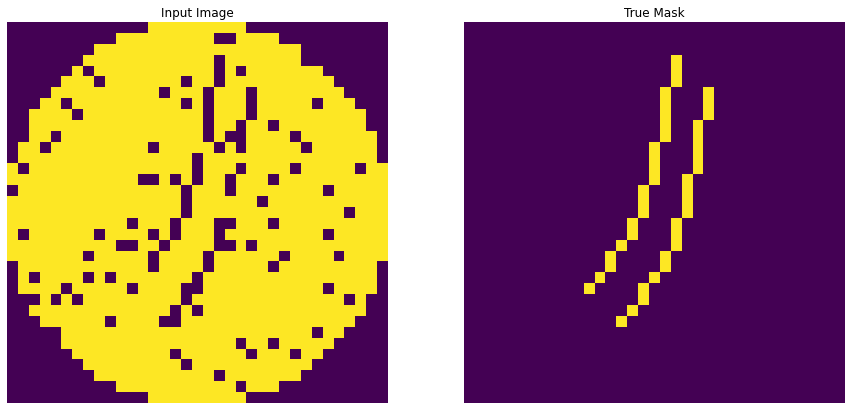

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


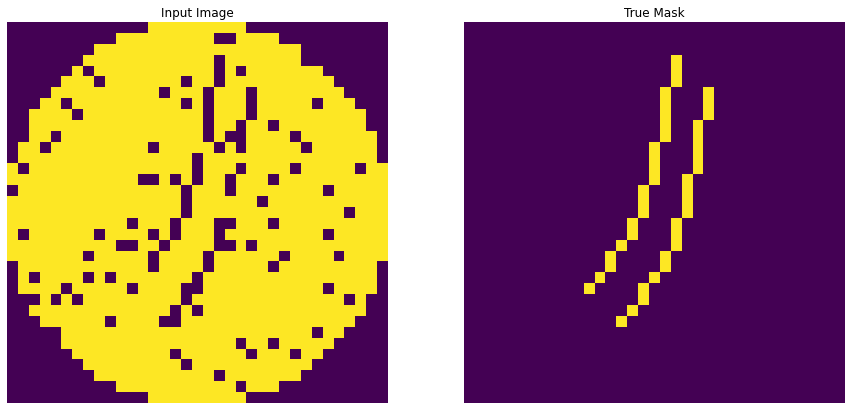

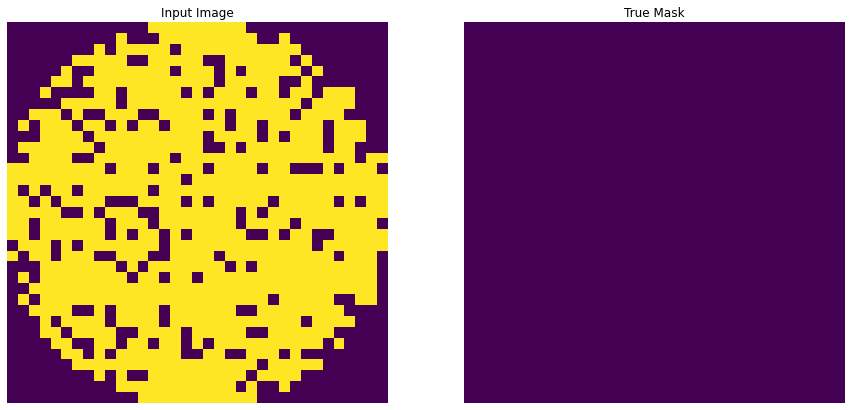

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


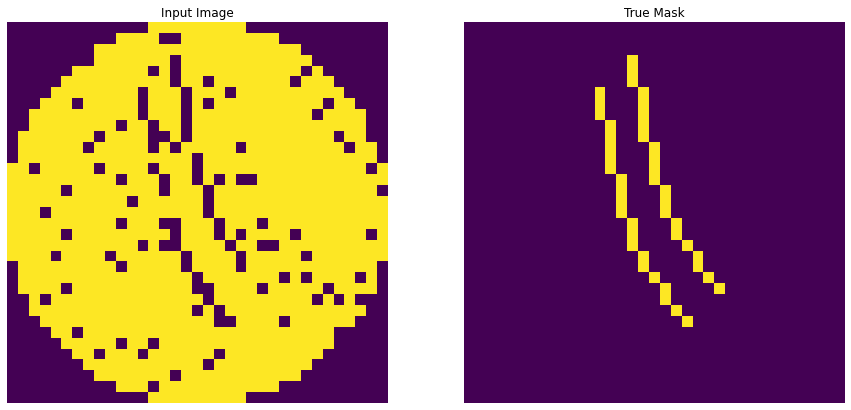

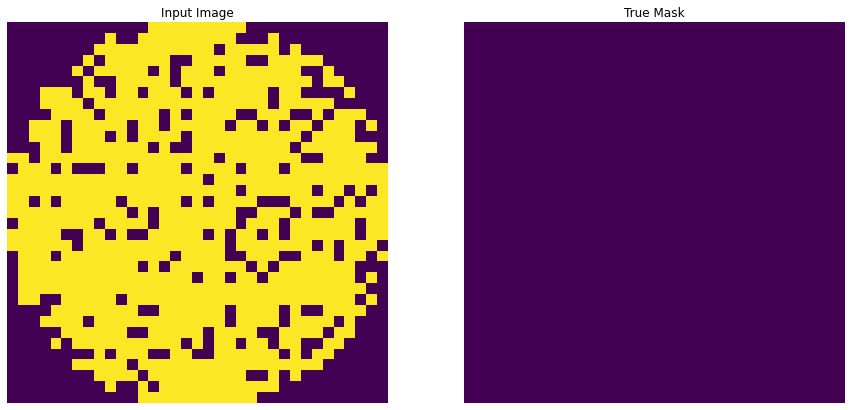

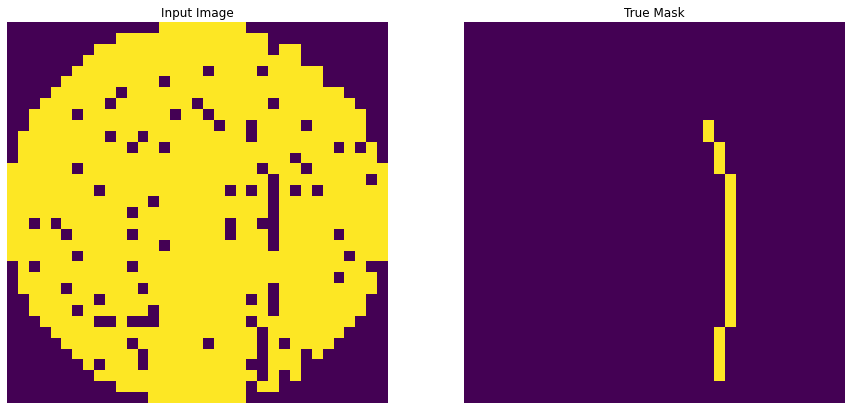

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


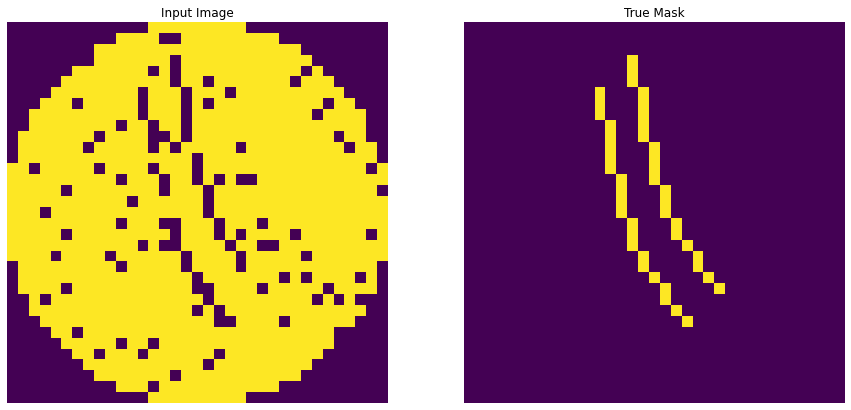

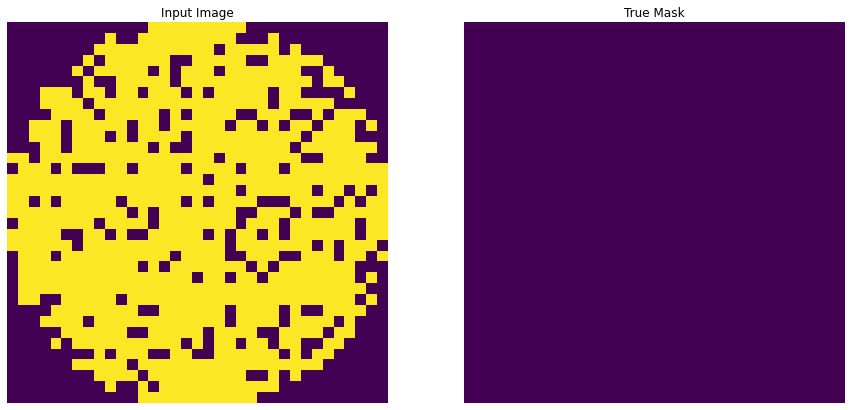

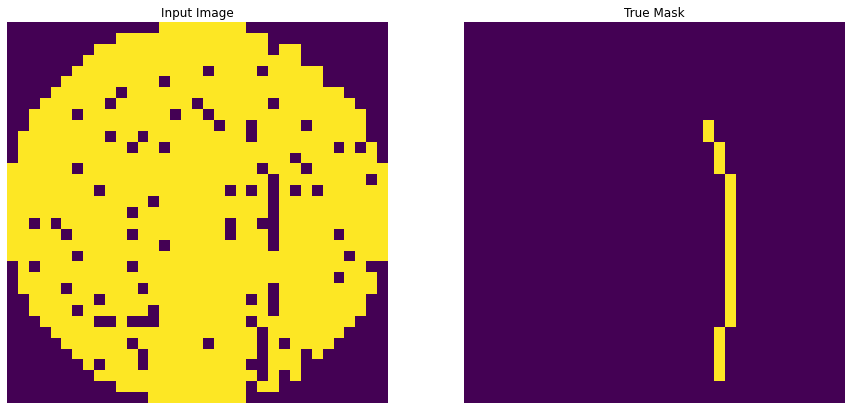

Cleanup called...
Cleanup called...


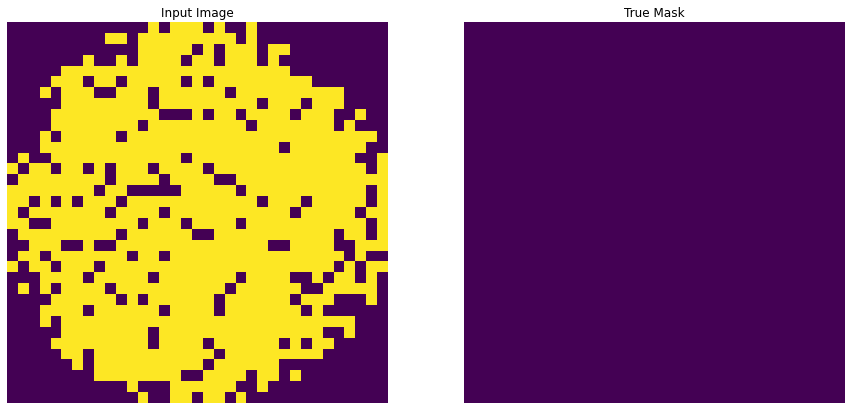

In [39]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

In [40]:
from tensorflow.keras import layers


def get_model(img_size , num_classes = 1):
    inputs = keras.Input(shape= img_size + [1,])

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model



In [41]:

# Free up RAM in case the model definition cells were run multiple times

keras.backend.clear_session()

# Build model
model = model = get_model([35,35], 1)

Let's try out the model to see what it predicts before training.

In [156]:
#img_size = [256,256]
train_dataset.take(1)

<TakeDataset shapes: ((14, 35, 35, 1), (14, 35, 35, 1)), types: (tf.float32, tf.float32)>

In [ ]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [43]:
pred_mask = model.predict(sample_image[tf.newaxis, ...])
pred_mask.shape()

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]]], dtype=float32)

In [158]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics =[tf.keras.metrics.MeanIoU(num_classes=2)])

early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)


callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)


In [159]:
def add_sample_weights(image, label):
  # The weights for each class, with the constraint that:
  #     sum(class_weights) == 1.0
  class_weights = tf.constant([20.0, 1.0])
  class_weights = class_weights/tf.reduce_sum(class_weights)

  # Create an image of `sample_weights` by using the label at each pixel as an 
  # index into the `class weights` .
  sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))

  return image, label, sample_weights

In [160]:
train_dataset.map(add_sample_weights).element_spec

(TensorSpec(shape=(14, 35, 35, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(14, 35, 35, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(14, 35, 35, 1), dtype=tf.float32, name=None))

In [162]:

steps = TRAIN_LENGTH // BATCH_SIZE
Epochs = 1
model.fit(train_dataset, 
          epochs= Epochs,
          validation_data=valid_dataset,
          steps_per_epoch = steps,
          callbacks= [DisplayCallback(), early_stop]
          )

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/losses.py:1809 binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/backend.py:5000 binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:246 sigmoid_cross_entropy_with_logits_v2
        logits=logits, labels=labels, name=name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:133 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((14, 48, 48, 1) vs (14, 35, 35, 1))


In [ ]:
for elem in test:
    pred = model.predict(elem)
    print(pred)
    break

In [ ]:
IsScratchDie = model.predict(test_dataset)
#df_wafers_test['IsScratchDie'] = IsScratchDie

In [ ]:
model.predict(test_dataset)


In [ ]:
test.shape()

In [ ]:
for elem in train_images:
    print(elem.shape)
    break

In [ ]:
train_generator = tf.data.Dataset.zip((train_images, train_masks))

In [ ]:
for elem in train_generator:
    print(elem.shape)
    break

In [ ]:
TRAIN_LENGTH = 3920
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    # self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels = None):
    inputs = self.augment_inputs(inputs)
   # labels = self.augment_labels(labels)
    return inputs

In [ ]:
train_generator.cache().shuffle(BUFFER_SIZE).repeat().map(Augment()).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
train_batches = (
    train_generator
    .cache()
    .shuffle(BUFFER_SIZE)
    .repeat()
    .map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
for images, masks in train_batches.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask])

In [ ]:
 loading image data...
def data_loader(folder_dir):
    # folder_dir = "../data/semantic_drone_dataset/training_set/images/"
    image_dataset = []
    for images in os.listdir(folder_dir):
        image = cv2.imread(folder_dir+'/'+images, 1)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        image = Image.fromarray(image)
        image = np.array(image)
        image_dataset.append(image)
    return image_dataset

In [ ]:
image_dataset = 

In [ ]:
train_batches.take(2)

Deprecated: tf.keras.preprocessing.image.ImageDataGenerator is not recommended for new code. Prefer loading images with tf.keras.utils.image_dataset_from_directory and transforming the output tf.data.Dataset with preprocessing layers. For more information, see the tutorials for loading images and augmenting images, as well as the preprocessing layer guide.

In [ ]:
# we create two instances with the same arguments
# we create two instances with the same arguments

from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen_args = dict(featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range= 90)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_datagen.fit(images, augment=True, seed=seed)
mask_datagen.fit(masks, augment=True, seed=seed)
image_generator = image_datagen.flow_from_directory(
    '/kaggle/working/images/train/imgs',
    class_mode='binary',
    seed=seed)
mask_generator = mask_datagen.flow_from_directory(
    '/kaggle/working/images/train/masks',
    class_mode='binary',
    seed=seed)
# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=2 ,  input_height=416, input_width=608  )

model.train(
    train_images =  "/kaggle/working/images/train/imgs",
    train_annotations = "/kaggle/working/images/train/masks",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5
)


In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [ ]:
convert_data_to_images(gini_wafer,'/kaggle/working/images/test')

In [ ]:
gini_wafer[['DieX', 'DieY', 'IsScratchDie']].values

In [ ]:
Image.open('/kaggle/working/3b2e28_mask.png')

In [ ]:
Image.open('/kaggle/working/3b2e28.png')

In [ ]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask = tf.cast(input_mask, tf.float32) / 255.0
    
  return input_image, input_mask

In [ ]:
df_wm811=pd.read_pickle("/kaggle/input/wm811k-wafer-map/LSWMD.pkl")
df_wm811.info()

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [ ]:
#TODO add your thoughts

# Submission